In [1]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [5]:
#Let's see descriptive statistics 
summary(cars)
#and the standard deviation
print(apply(cars,2,sd))

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

    speed      dist 
 5.287644 25.769377 


In [3]:
lncars <- log(cars)
summary(lncars)
#And the standard deviation
print(apply(lncars,2,sd))

     speed            dist       
 Min.   :1.386   Min.   :0.6931  
 1st Qu.:2.485   1st Qu.:3.2581  
 Median :2.708   Median :3.5835  
 Mean   :2.662   Mean   :3.5359  
 3rd Qu.:2.944   3rd Qu.:4.0254  
 Max.   :3.219   Max.   :4.7875  

    speed      dist 
0.4149081 0.7764719 


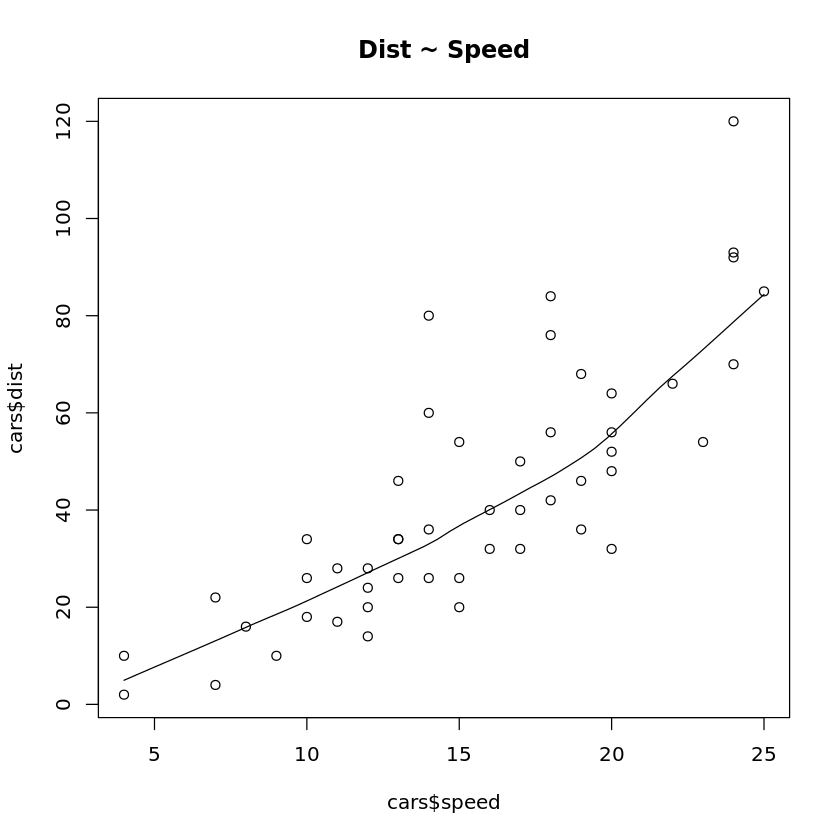

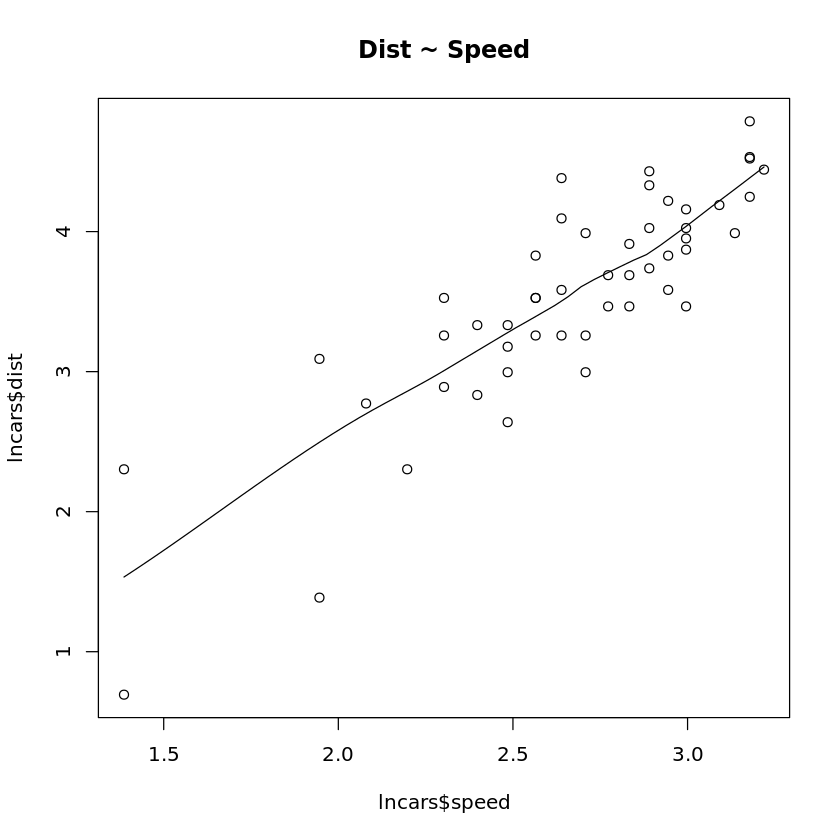

In [11]:
#plot variables 
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")
scatter.smooth(x=lncars$speed, y=lncars$dist, main="Dist ~ Speed")


In [6]:
#run a regressio using original data 
original <- lm(dist ~ speed, data=cars)
summary(original)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


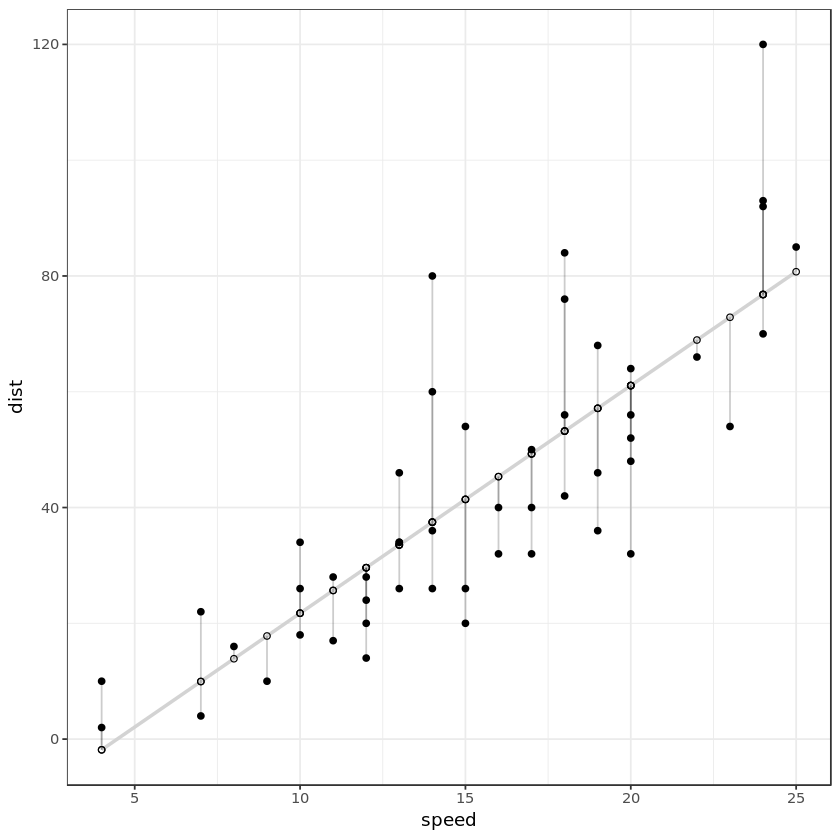

In [7]:
#get predicted y 
cars$predicted <- predict(original)
#Plot actual vs predicted 

library(ggplot2)
ggplot(cars, aes(x = speed, y = dist)) +
geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # Plot regression slope
  geom_segment(aes(xend = speed, yend = predicted), alpha = .2) +  # alpha to fade lines
  geom_point() +
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw() 


Call:
lm(formula = dist ~ speed, data = lncars)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00215 -0.24578 -0.02898  0.20717  0.88289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.7297     0.3758  -1.941   0.0581 .  
speed         1.6024     0.1395  11.484 2.26e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4053 on 48 degrees of freedom
Multiple R-squared:  0.7331,	Adjusted R-squared:  0.7276 
F-statistic: 131.9 on 1 and 48 DF,  p-value: 2.259e-15


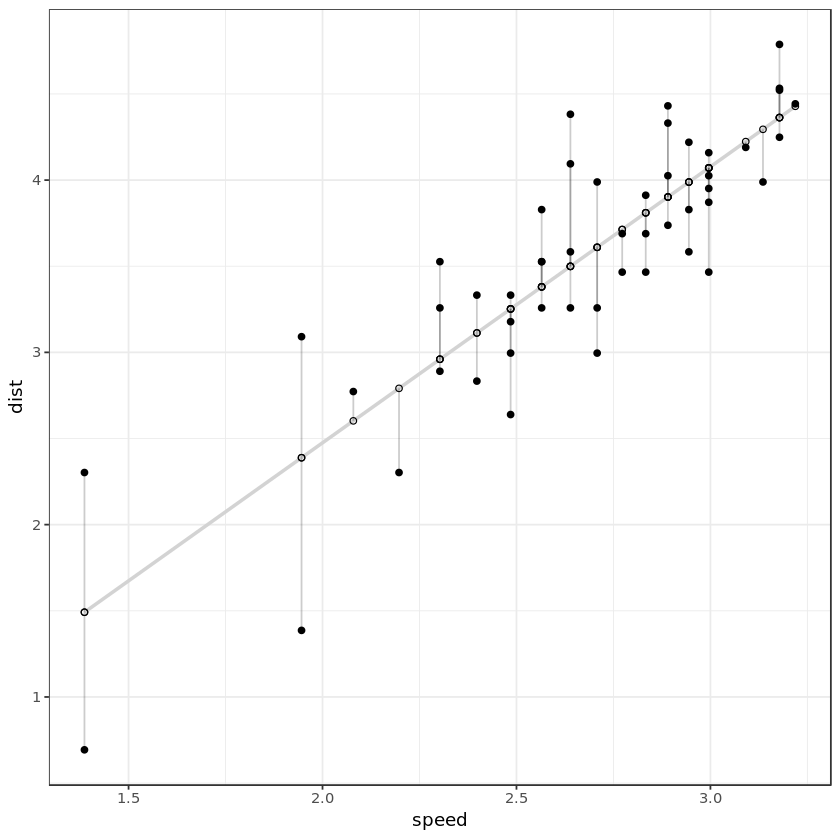

In [13]:
#run a regressio using log transformation of  data 
loglog <- lm(dist ~ speed, data=lncars)
summary(loglog)
#get predicted y 
lncars$predicted2 <- predict(loglog)

#Plot actual vs predicted 
ggplot(lncars, aes(x = speed, y = dist)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # Plot regression slope
  geom_segment(aes(xend = speed, yend = predicted2), alpha = .2) +  # alpha to fade lines
  geom_point() +
  geom_point(aes(y = predicted2), shape = 1) +
  theme_bw() 